In [210]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd

In [211]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [212]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [213]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [214]:
X=data.drop(['target'], axis = 1)
Y = data['target']

In [215]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [216]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)
print("Accuracy Score:", accuracy_score(predictions, Y_test))

Accuracy Score: 0.9649122807017544


In [217]:
dtree.get_depth()

9

In [218]:
acc_list_dtree_test = []
acc_list_dtree_train = []
for i in range(1,dtree.get_depth()+10):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, Y_train)
    predictions_test = dtree.predict(X_test)
    predictions_train = dtree.predict(X_train)
    acc_list_dtree_test.append(accuracy_score(predictions_test, Y_test))
    acc_list_dtree_train.append(accuracy_score(predictions_train, Y_train))

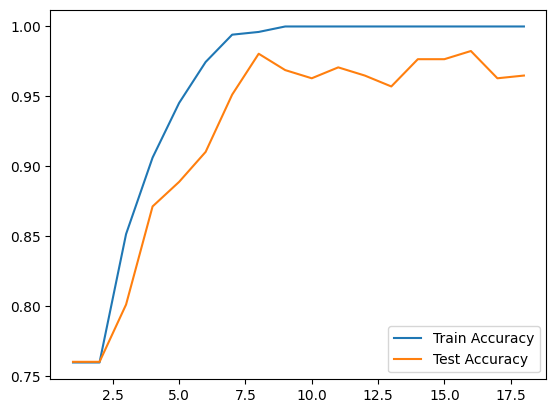

In [219]:
import matplotlib.pyplot as plt
plt.plot(range(1,dtree.get_depth()+10), acc_list_dtree_train)
plt.plot(range(1,dtree.get_depth()+10), acc_list_dtree_test)
plt.legend(["Train Accuracy", "Test Accuracy"])

# Inference
The model seems to overfit around max depth = 9 or 10

Therefore, for improving generalization capability we shall restrict the max depth to 8.

In [220]:
dtree = DecisionTreeClassifier(max_depth = 8)
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)
print("Test Accuracy Score:", accuracy_score(predictions, Y_test))

Test Accuracy Score: 0.9610136452241715


In [221]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)
print("Test Accuracy Score:", accuracy_score(predictions, Y_test))

Test Accuracy Score: 0.9707602339181286


[Text(0.46774193548387094, 0.95, 'x[2] <= 0.5\ngini = 0.5\nsamples = 512\nvalue = [258, 254]'),
 Text(0.24596774193548387, 0.85, 'x[11] <= 0.5\ngini = 0.36\nsamples = 255\nvalue = [195, 60]'),
 Text(0.14516129032258066, 0.75, 'x[12] <= 2.5\ngini = 0.497\nsamples = 113\nvalue = [61, 52]'),
 Text(0.04838709677419355, 0.65, 'x[7] <= 119.5\ngini = 0.391\nsamples = 60\nvalue = [16, 44]'),
 Text(0.03225806451612903, 0.55, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.06451612903225806, 0.55, 'x[12] <= 1.5\ngini = 0.302\nsamples = 54\nvalue = [10, 44]'),
 Text(0.03225806451612903, 0.45, 'x[0] <= 54.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.016129032258064516, 0.35, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.04838709677419355, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.0967741935483871, 0.45, 'x[0] <= 60.0\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(0.08064516129032258, 0.35, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.11290322580

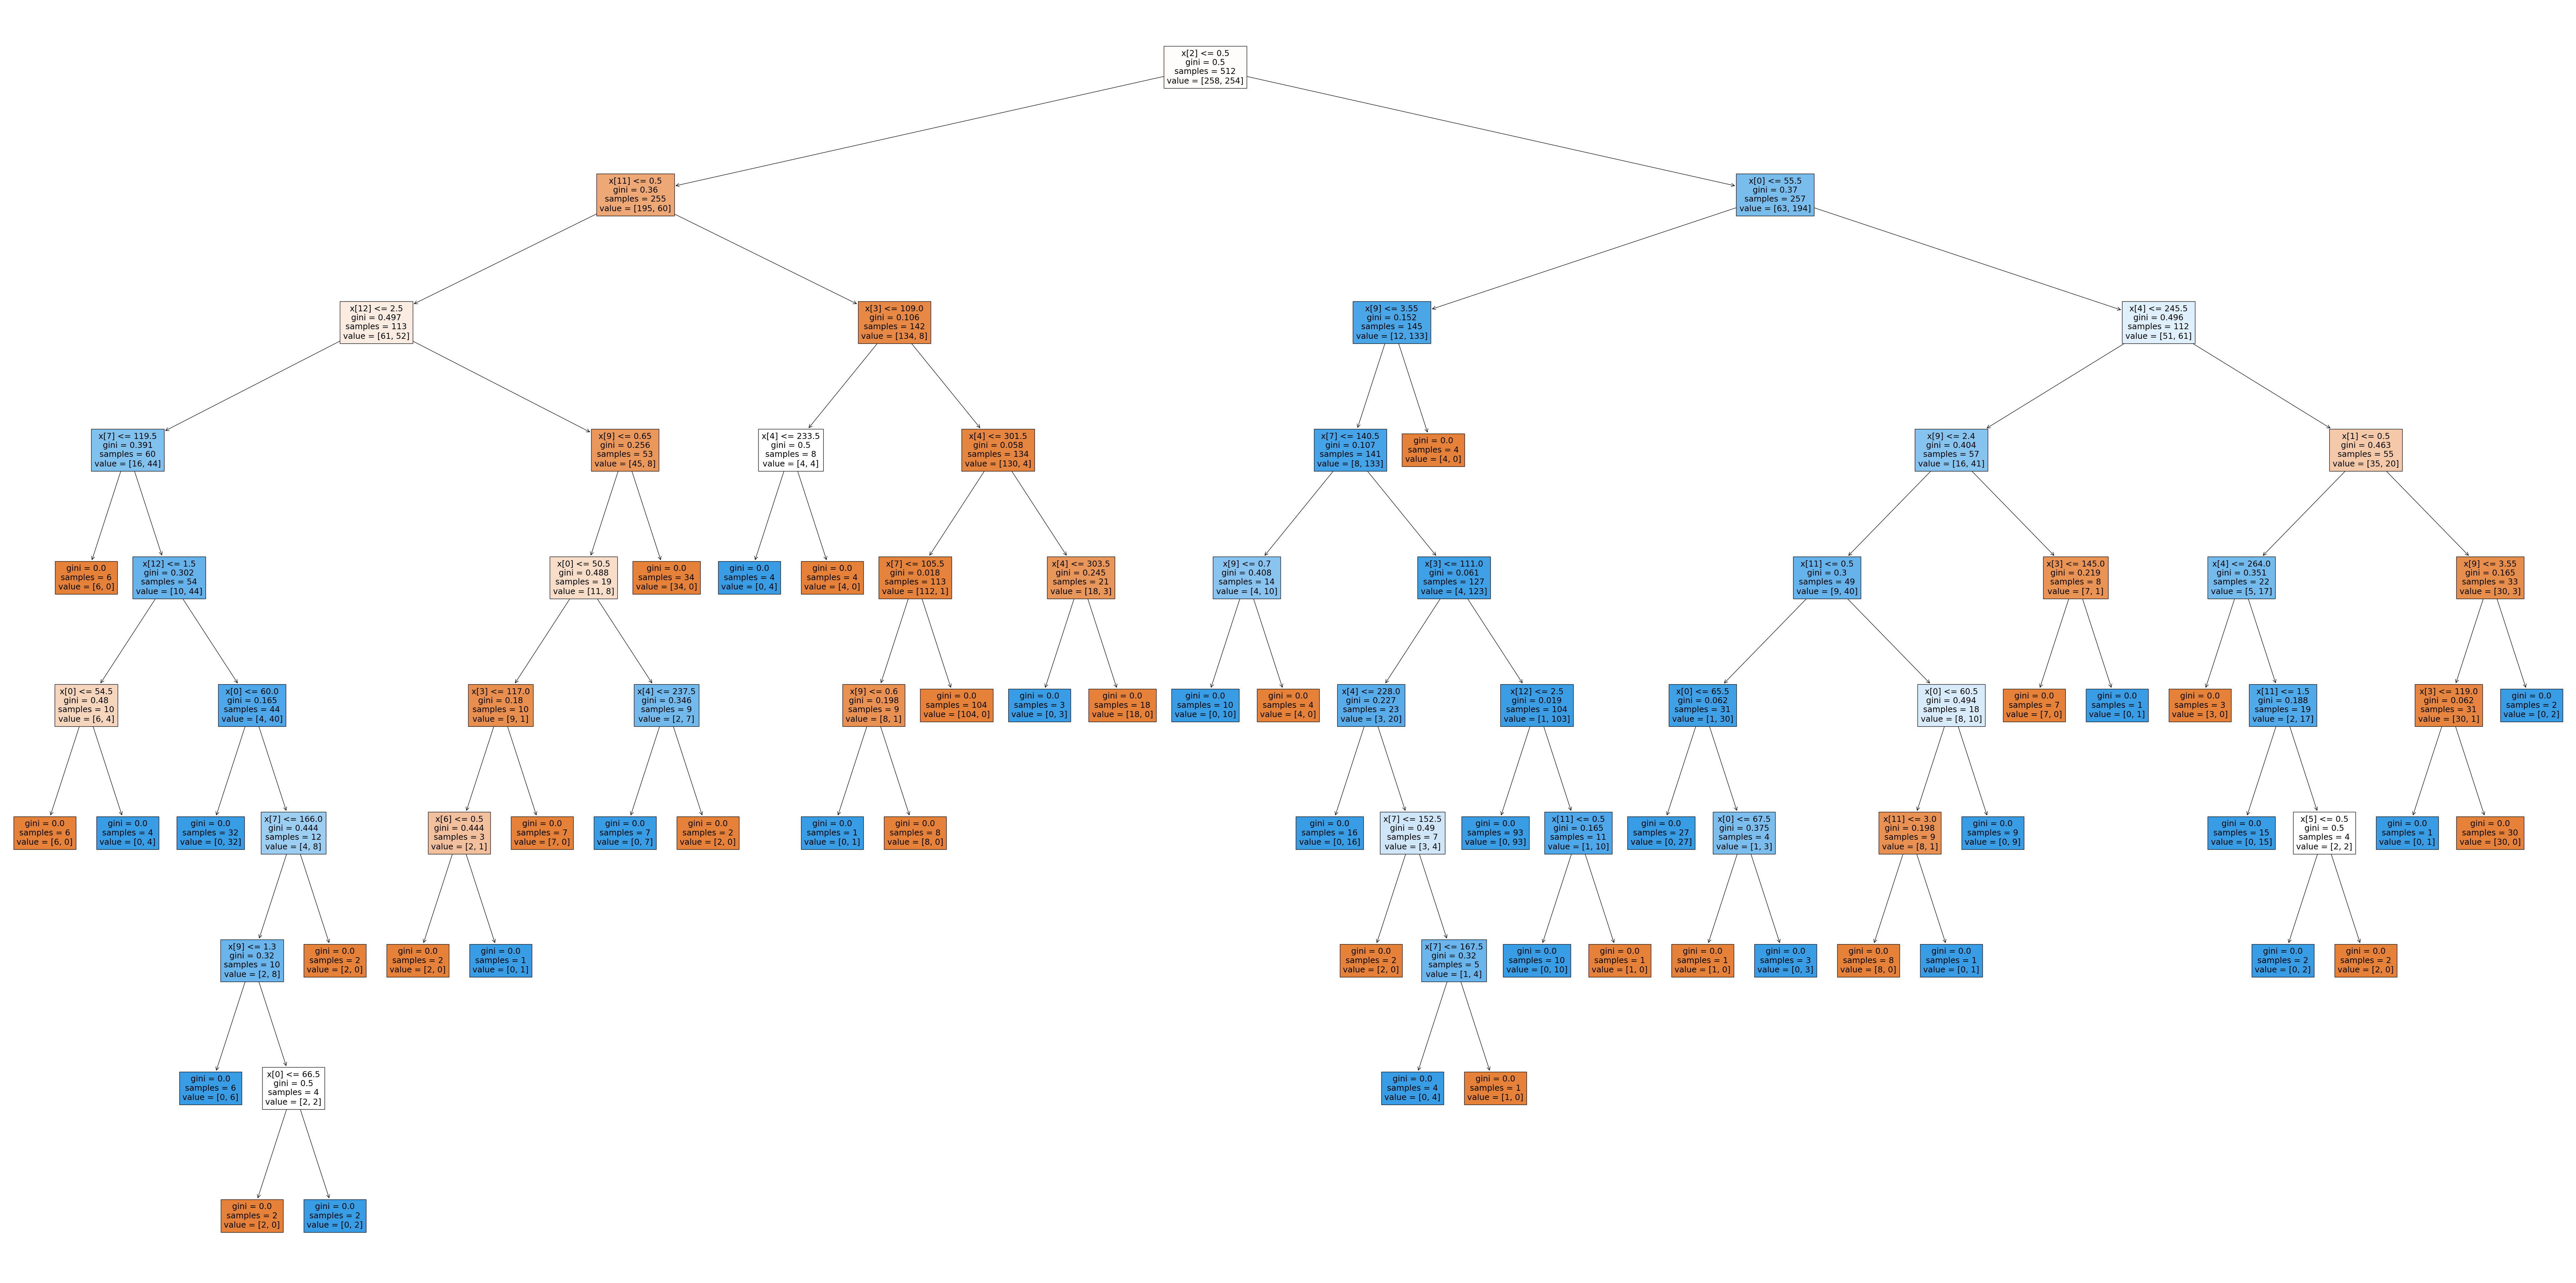

In [222]:
plt.figure(figsize = (100,50))
plot_tree(dtree, filled = True)

In [223]:
rforestMain = RandomForestClassifier()
rforestMain.fit(X_train, Y_train)
predictions = rforestMain.predict(X_test)
print("Accuracy Score:", accuracy_score(predictions, Y_test))

Accuracy Score: 0.9824561403508771


# Comparision
As we can see, that the maximum accuracy we are able to obtain using Decision tree is roughly around 95-96% whereas Random Forest Classifier enables us to reach accuracies upto 98%.

This is because a simple decision tree is prone to overfitting of data if allowed to grow to full depth, hence, performing poorly on test data. 

Random Forest on the other hand, is an ensemble of Decision Trees which aggregates the output of multiple decision trees over different subsets of data, hence, reducing overfitting and improving generlization.

# Mutual Information to interpret feature importances

In [224]:
from sklearn.feature_selection import mutual_info_classif

([<matplotlib.axis.XTick at 0x7aa29bd39350>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

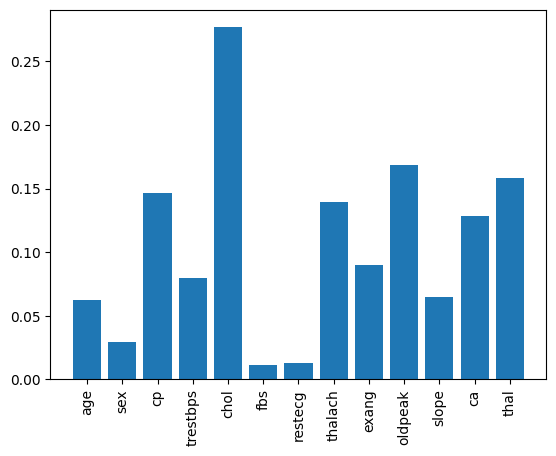

In [225]:
plt.bar(range(X.shape[1]),mutual_info_classif(X, Y))
plt.xticks(range(X.shape[1]), X.columns, rotation=90)

### As we can see from the above plot the "chol" column has the maximum importance in affecting the outcome.

# Cross Validation

In [226]:
rforestNew = RandomForestClassifier()
scores = cross_val_score(rforestNew, X, Y, cv=5)
scores.mean()

0.9970731707317073

In [227]:
dtreeNew = DecisionTreeClassifier()
scores = cross_val_score(dtreeNew, X, Y, cv=5)
scores.mean()

1.0